# **Prepare Survey Data for Analysis**

 ## **Survey Data**: World Bank Living Standards Measurement Study (LSMS)

  - **Link**: https://microdata.worldbank.org/index.php/catalog/lsms/

  - **Dataset Title**: Fourth Integrated Household Survey  (IHS4) 2016-2017 Malawi

  - **Unit of Analysis**: Households

  - **Study Period**: April 2016 - April 2017

  - **Geographic Coverage**: Malawi

  - **Enumeration Area (EA)**:  780 EAs

  - **Data Collectors**:  Government of Malawi through the National Statistical Office (NSO)

  - **DOI**: https://doi.org/10.48529/g2p9-9r19

  - **Data files**:

    1.  IHS4 Consumption Aggregate (71 variables )

        **Variables**:
        - **case_id**: Unique Household Identifier
        - **rexpagg**: Total annual consumption within households: It is the average annual expenditure on various goods and services within households surveyed in the LSMS IHS4.
        - **hhsize**: Household size
  
    2.  HouseholdGeovariablesIHS4 (39 variables)

        **Variables**:
        - **case_id**: Unique Household Identifier
        - **Lat and Lon**: GPS latitude and longitude
  


## ***Download LSMS survey data*** (Consumption, household size, geolocation data)

- Navigate to the following World Bank Microdata catalog link: https://microdata.worldbank.org/index.php/catalog/2936/data-dictionary/F98?file_name=HouseholdGeovariablesIHS4

- Click on the "Get Microdata" button.

- A prompt will appear, asking you to either login or register to access the data.

- Once logged in, you have the option to download the data in ASCII, CSV, SPSS, and Stata formats.

- Download the desired format (CSV).

- Save the file to your working directory.


### Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Add absolute path to the project folder

In [2]:
import sys

sys.path.append("/content/drive/MyDrive/DL_Project_UNECA_Malawi/")

# See the full list of paths in sys.path
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/DL_Project_UNECA_Malawi/']

### Importing necessary python libraries and modules

In [3]:
# For interacting with the operating system, such as reading or writing files.
import os

# Importing the pandas library for manipulation DataFrame.
import pandas as pd

# Importing the numpy library for array and matrix manipulation.
import numpy as np

# Importing the matplotlib.pyplot for data visualization.
import matplotlib.pyplot as plt

# Importing the seaborn library for enhanced data visualization.
import seaborn as sns

# Importing the plotly.express library for interactive plots.
import plotly.express as px

# Importing the plotly.graph_objects library for more control over plots.
import plotly.graph_objects as go

# Importing a custom utility function 'create_space' from the 'utils' module.
from utils import create_space

# Importing the warnings module to manage warning messages during code execution.
import warnings

# Filtering out DeprecationWarnings to avoid clutter in the output.
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Enabling inline plotting for matplotlib in Jupyter notebooks.
%matplotlib inline

### Add Base Directory

In [4]:
# Sets the base directory variable
BASE_DIR = '/content/drive/MyDrive/DL_Project_UNECA_Malawi/'

In [5]:
# Move to the base directory
!cd $BASE_DIR/
!pwd

/content


### Define the folder data paths

In [6]:
# Creates the BASE_DIR variable & join it to the BASE_DIR
COUNTRIES_DIR = os.path.join(BASE_DIR, 'countries')

# Creates the PROCESSED_DIR variable & join it to the BASE_DIR
PROCESSED_DIR = os.path.join(BASE_DIR, 'processed')

# Creates the RESULTS_DIR variable & join it to the BASE_DIR
RESULTS_DIR = os.path.join(BASE_DIR, 'results')


# Creates the LSMS_DIR variable & join it to the COUNTRIES_DIR
LSMS_DIR = os.path.join(COUNTRIES_DIR, 'malawi_2016', 'lsms')

# Creates the NIGHTLIGHTS_DIR variable & join it to the BASE_DIR
NIGHTLIGHTS_DIR = os.path.join(BASE_DIR, 'nightlight', 'malawi_2016')



# Print the variables
print(COUNTRIES_DIR)
print(PROCESSED_DIR)
print(RESULTS_DIR)
print(LSMS_DIR)
print(NIGHTLIGHTS_DIR)

/content/drive/MyDrive/DL_Project_UNECA_Malawi/countries
/content/drive/MyDrive/DL_Project_UNECA_Malawi/processed
/content/drive/MyDrive/DL_Project_UNECA_Malawi/results
/content/drive/MyDrive/DL_Project_UNECA_Malawi/countries/malawi_2016/lsms
/content/drive/MyDrive/DL_Project_UNECA_Malawi/nightlight/malawi_2016


###  Create directories in the current working directory

In [7]:
!mkdir -p $BASE_DIR/countries
!mkdir -p $BASE_DIR/processed
!mkdir -p $BASE_DIR/results
!mkdir -p $BASE_DIR/nightlight/malawi_2016
!mkdir -p $BASE_DIR/countries/malawi_2016/lsms

In [8]:
!ls $BASE_DIR

countries  nightlight  processed  __pycache__  results	Scripts  utils	utils.py


### Define the file path for **consumption data files**


In [9]:
# Define variable consumption_file

consumption_file = 'ihs4_consumption_aggregate.csv'
consumption_file

'ihs4_consumption_aggregate.csv'

#### Define the column name for **case ID**

In [10]:
case_col = 'case_id'
case_col

'case_id'

#### Define the column name for **household size**

In [11]:
hhsize_col = 'hhsize'
hhsize_col

'hhsize'

#### Define the column name for **total annual per capita consumption**

In [12]:
consumption_ph_col = 'rexpagg'
consumption_ph_col

'rexpagg'

### Check if there is missing file in the LSMS directory

In [13]:
for file in [consumption_file]:
    assert os.path.isfile(os.path.join(LSMS_DIR, file)), print(f'Could not find {file}')

### Load the consumption data into a DataFrame


In [14]:
df_cons = pd.read_csv(os.path.join(LSMS_DIR, consumption_file))
df_cons

,case_id,ea_id,district,TA,region,area,urban,sdate,smonth,syear,...,rexpagg,rexpaggpc,upline_2016,pline_2016,poor,upoor,gap_poor,gap_ultra,gap2_poor,gap2_ultra
0,301025230225,30102523,301,2,3,4,2,30,3,2017,...,2.976814e+05,99227.132812,85260.164062,137427.984375,100,0,27.796997,0.000000,7.726730,0.000000
1,210374850204,21037485,210,37,2,1,1,15,4,2016,...,1.732338e+06,346467.687500,85260.164062,137427.984375,0,0,0.000000,0.000000,0.000000,0.000000
2,311057710075,31105771,311,5,3,4,2,20,5,2016,...,4.677542e+05,93550.835938,85260.164062,137427.984375,100,0,31.927376,0.000000,10.193573,0.000000
3,312048040073,31204804,312,4,3,4,2,10,3,2017,...,3.866343e+05,77326.859375,85260.164062,137427.984375,100,100,43.732815,9.304820,19.125591,0.865797
4,311097790117,31109779,311,9,3,4,2,7,7,2016,...,8.311835e+05,118740.500000,85260.164062,137427.984375,100,0,13.598020,0.000000,1.849061,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442,205053630064,20505363,205,5,2,3,2,18,5,2016,...,4.838861e+05,96777.226562,85260.164062,137427.984375,100,0,29.579679,0.000000,8.749575,0.000000
12443,307106820173,30710682,307,10,3,4,2,11,2,2017,...,5.241950e+05,262097.500000,85260.164062,137427.984375,0,0,0.000000,0.000000,0.000000,0.000000
12444,208074540130,20807454,208,7,2,3,2,19,12,2016,...,4.210086e+05,84201.726562,85260.164062,137427.984375,100,100,38.730289,1.241421,15.000354,0.015411
12445,312048040036,31204804,312,4,3,4,2,9,3,2017,...,3.371381e+05,112379.351562,85260.164062,137427.984375,100,0,18.226734,0.000000,3.322138,0.000000


### Select only the necessary columns for further processing

In [15]:
df_cons_sel = df_cons[[case_col, hhsize_col, consumption_ph_col ]]
df_cons_sel.round(3)

,case_id,hhsize,rexpagg
0,301025230225,3,297681.406
1,210374850204,5,1732338.500
2,311057710075,5,467754.188
3,312048040073,5,386634.281
4,311097790117,7,831183.500
...,...,...,...
12442,205053630064,5,483886.125
12443,307106820173,2,524195.000
12444,208074540130,5,421008.625
12445,312048040036,3,337138.062


### Normalize the consumption values based on the relative cost of living and currency exchange rates.

*  Obtain the Purchasing Power Parity (PPP) for Malawi in 2016 from the World Bank dataset: World Bank PPP Data.

  * Link: https://data.worldbank.org/indicator/PA.NUS.PRVT.PP?locations=MW

  * ppp = 215.182

* Standardize the consumption value of a country by dividing them by the Purchasing Power Parity (PPP) by dividing the consumption value of a country by the PPP.

* To express the values in a daily consumption time scale, further divide them by 365 days.

*  The outcome represents the consumption per household per day for that given year.




In [16]:
# PPP value
ppp = 215.182

# Copy the dataframe into new dataframe
df_cons_norm = df_cons_sel.copy()

# Compute the standardize consumption per household per day
df_cons_norm[consumption_ph_col] = df_cons_norm[consumption_ph_col] / ppp / 365

# Rename the column name for the standardize consumption per household per day
df_cons_norm.rename(columns={'rexpagg': 'con_norm_day'}, inplace=True)
df_cons_norm

,case_id,hhsize,con_norm_day
0,301025230225,3,3.790120
1,210374850204,5,22.056366
2,311057710075,5,5.955509
3,312048040073,5,4.922679
4,311097790117,7,10.582740
...,...,...,...
12442,205053630064,5,6.160903
12443,307106820173,2,6.674121
12444,208074540130,5,5.360338
12445,312048040036,3,4.292487


### Define the file path for the household geovariables data files

In [17]:
geovariables_file = 'householdgeovariablesihs4.csv'
geovariables_file

'householdgeovariablesihs4.csv'

### Check if there is missing file in the LSMS directory

In [18]:
for file in [geovariables_file]:
    assert os.path.isfile(os.path.join(LSMS_DIR, file)), print(f'Could not find {file}')

 #### Define the column names for latitude and longitude

In [19]:
lat_col = 'lat_modified'
lon_col = 'lon_modified'

### Load the household geovariables data into a DataFrame

In [20]:
df_geo = pd.read_csv(os.path.join(LSMS_DIR, geovariables_file))
df_geo

,case_id,HHID,lat_modified,lon_modified,dist_road,dist_popcenter,dist_admarc,dist_auction,dist_boma,dist_borderpost,...,sq7,anntot_avg,wetQ_avg,wetQ_avgstart,h2015_tot,h2015_wetQ,h2015_wetQstart,h2016_tot,h2016_wetQ,h2016_wetQstart
0,301025230225,0001c970eecf473099368557e2080b3e,-14.683761,34.915074,13.0,32.0,17.0,125.0,44.0,39.0,...,3.0,808.0,631.0,17.0,1007.0,889.0,17.0,614.0,478.0,17.0
1,210374850204,000509f5cfcc4b078a09672b09425e95,-14.005029,33.794591,2.0,3.0,3.0,3.0,3.0,74.0,...,1.0,812.0,630.0,16.0,783.0,643.0,17.0,638.0,487.0,18.0
2,311057710075,000bc107780044e59327dbf7ec960ac1,-16.826165,35.269503,1.0,12.0,2.0,115.0,12.0,36.0,...,1.0,724.0,593.0,16.0,896.0,821.0,17.0,585.0,366.0,17.0
3,312048040073,000d1d26325d4f73a2ffbb8a99ab4752,-15.004730,35.163219,1.0,7.0,10.0,89.0,23.0,70.0,...,1.0,790.0,615.0,16.0,1079.0,960.0,17.0,690.0,497.0,17.0
4,311097790117,00104e33315844fdb2b8c6fdd35912a1,-17.016698,35.079629,15.0,23.0,15.0,135.0,23.0,21.0,...,4.0,692.0,565.0,16.0,843.0,784.0,17.0,490.0,315.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12442,312048040036,fffaa977174c43d79793cf945b57f948,-15.004730,35.163219,1.0,8.0,12.0,91.0,23.0,69.0,...,3.0,789.0,615.0,16.0,1071.0,953.0,17.0,687.0,495.0,17.0
12443,305016150137,fffeb745ef814983b85ed37694fb0033,-15.558742,35.010733,2.0,26.0,4.0,28.0,26.0,60.0,...,1.0,777.0,605.0,17.0,1036.0,939.0,16.0,577.0,424.0,17.0
12444,104031830093,125096793d5b48a58a0114e46152eee9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12445,314408470035,99f0a5ac22ce4c1ba5313bbbaff6c748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Select only the necessary columns related to coordinates

In [21]:
df_cords = df_geo[['case_id', lat_col, lon_col]]
df_cords

,case_id,lat_modified,lon_modified
0,301025230225,-14.683761,34.915074
1,210374850204,-14.005029,33.794591
2,311057710075,-16.826165,35.269503
3,312048040073,-15.004730,35.163219
4,311097790117,-17.016698,35.079629
...,...,...,...
12442,312048040036,-15.004730,35.163219
12443,305016150137,-15.558742,35.010733
12444,104031830093,NaN,NaN
12445,314408470035,NaN,NaN


### Rename the columns for latitude and longitude

In [22]:
df_cords.rename(columns={lat_col: 'cluster_lat', lon_col: 'cluster_lon'}, inplace=True)
df_cords

<ipython-input-22-50087628eed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cords.rename(columns={lat_col: 'cluster_lat', lon_col: 'cluster_lon'}, inplace=True)


,case_id,cluster_lat,cluster_lon
0,301025230225,-14.683761,34.915074
1,210374850204,-14.005029,33.794591
2,311057710075,-16.826165,35.269503
3,312048040073,-15.004730,35.163219
4,311097790117,-17.016698,35.079629
...,...,...,...
12442,312048040036,-15.004730,35.163219
12443,305016150137,-15.558742,35.010733
12444,104031830093,NaN,NaN
12445,314408470035,NaN,NaN


### Merge the consumption and geovariable data frame

In [23]:
df_combined = pd.merge(df_cons_norm, df_cords, on='case_id')
df_combined

,case_id,hhsize,con_norm_day,cluster_lat,cluster_lon
0,301025230225,3,3.790120,-14.683761,34.915074
1,210374850204,5,22.056366,-14.005029,33.794591
2,311057710075,5,5.955509,-16.826165,35.269503
3,312048040073,5,4.922679,-15.004730,35.163219
4,311097790117,7,10.582740,-17.016698,35.079629
...,...,...,...,...,...
12442,205053630064,5,6.160903,-14.038697,34.511056
12443,307106820173,2,6.674121,-15.959665,35.034930
12444,208074540130,5,5.360338,-14.263875,34.518640
12445,312048040036,3,4.292487,-15.004730,35.163219


### Check for the missing data

In [24]:
# Check which columns have the missing data
df_combined['con_norm_day'].isnull().values.any(), \
df_combined['hhsize'].isnull().values.any(),\
df_combined['cluster_lat'].isnull().values.any(),\
df_combined['cluster_lon'].isnull().values.any()

(False, False, True, True)

### Count the missing data

In [25]:
df_combined['cluster_lat'].isnull().sum(), df_combined['cluster_lon'].isnull().sum()

(3, 3)

### Identify rows with missing values

In [26]:
rows_with_missing_values = df_combined[df_combined.isnull().any(axis=1)]


# Display rows with missing values
print("\nRows with Missing Values:")
rows_with_missing_values


Rows with Missing Values:


,case_id,hhsize,con_norm_day,cluster_lat,cluster_lon
848,104031830093,3,7.785950,NaN,NaN
7454,314408470035,2,32.626752,NaN,NaN
10671,314358370219,6,29.342409,NaN,NaN


### Drop rows with missing values

In [27]:
df_combined.dropna(inplace=True)

In [28]:
df_combined['con_norm_day'].isnull().values.any(), \
df_combined['hhsize'].isnull().values.any(),\
df_combined['cluster_lat'].isnull().values.any(),\
df_combined['cluster_lon'].isnull().values.any()

(False, False, False, False)

## Group the data by the enumeration area (EA) coordinates (cluster)

*  The outcome represents the sum of consumption and household size in the EA

In [29]:
df_clusters = df_combined.groupby(['cluster_lat', 'cluster_lon']).sum().reset_index()

# Remove the case ID
df_clusters.drop(['case_id'], axis=1, inplace=True)

df_clusters

,cluster_lat,cluster_lon,hhsize,con_norm_day
0,-17.095150,35.217213,79,112.435878
1,-17.092351,35.114643,70,88.634262
2,-17.016698,35.079629,78,122.215825
3,-16.977243,35.205706,66,110.170181
4,-16.956385,35.168967,61,66.483327
...,...,...,...,...
775,-9.591378,33.057450,62,87.415796
776,-9.550397,33.291558,59,73.325259
777,-9.519230,33.139193,72,129.896761
778,-9.507538,33.259649,63,112.878656


### Calculate consumption per capita per day for each cluster

* To obtain consumption per capita per day: divide the total cluster consumption by the number of people in the cluster.

In [30]:
df_clusters['cons_pc'] = df_clusters['con_norm_day'] / df_clusters['hhsize']
df_clusters

,cluster_lat,cluster_lon,hhsize,con_norm_day,cons_pc
0,-17.095150,35.217213,79,112.435878,1.423239
1,-17.092351,35.114643,70,88.634262,1.266204
2,-17.016698,35.079629,78,122.215825,1.566870
3,-16.977243,35.205706,66,110.170181,1.669245
4,-16.956385,35.168967,61,66.483327,1.089891
...,...,...,...,...,...
775,-9.591378,33.057450,62,87.415796,1.409932
776,-9.550397,33.291558,59,73.325259,1.242801
777,-9.519230,33.139193,72,129.896761,1.804122
778,-9.507538,33.259649,63,112.878656,1.791725


### Summary Satistics

In [31]:
df_clusters['cons_pc'].describe()

count    780.000000
mean       2.428631
std        3.262697
min        0.724403
25%        1.545874
50%        1.853950
75%        2.483960
max       80.036069
Name: cons_pc, dtype: float64

In [32]:
df_clusters.agg(
    {
        "cons_pc": ["count","min", "max", "median", "mean", "std"],
    }
)

,cons_pc
count,780.000000
min,0.724403
max,80.036069
median,1.853950
mean,2.428631
std,3.262697


### Distributions of Household Sizes

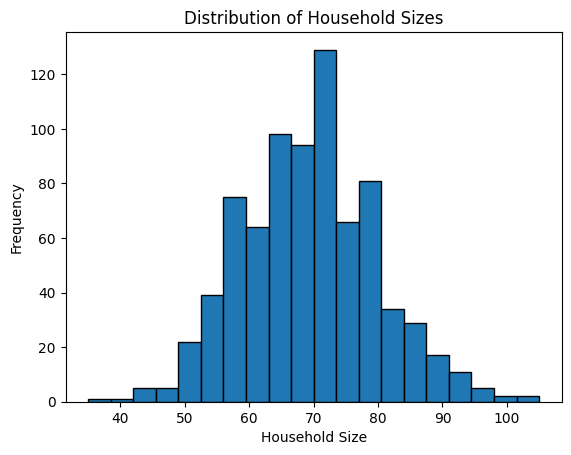

In [33]:
plt.hist(df_clusters['hhsize'], bins=20, edgecolor='black')
plt.xlabel('Household Size')
plt.ylabel('Frequency')
plt.title('Distribution of Household Sizes')
plt.show()

### Distributions of Consumption per capita

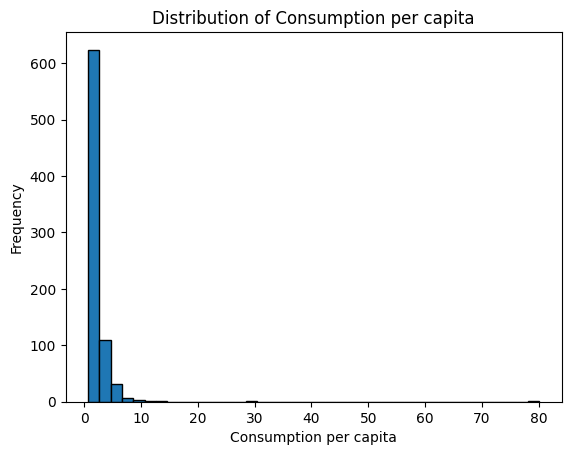

In [34]:
plt.hist(df_clusters['cons_pc'], bins=40, edgecolor='black')
plt.xlabel('Consumption per capita')
plt.ylabel('Frequency')
plt.title('Distribution of Consumption per capita')
plt.show()

### Map of consumption per capita

In [35]:
# Create a scatter mapbox plot
fig = px.scatter_mapbox(df_clusters, lat="cluster_lat", lon="cluster_lon", color="cons_pc", size="cons_pc",
                        color_continuous_scale="RdYlGn", size_max=20, zoom=6, hover_name="cons_pc")

# Update the layout
fig.update_layout(mapbox_style="carto-positron", coloraxis_colorbar=dict(title="Consumption per capita"),
                  mapbox=dict(center=dict(lat=-13.2543, lon=34.3015)))

fig.update_layout(title='Average Household size in Malawi for the Year 2016')

# Set the width and height
fig.update_layout(
    width=900,  # Specify the desired width in pixels
    height=900  # Specify the desired height in pixels
)

fig.update_layout(
    title="Daily Per Capita Consumption in Malawi for the Year 2016",
    title_font=dict(size=26),
    title_x=0.5,  # Position the title in the middle of the plot horizontally
    title_y=0.97   # Position the title closer to the top of the plot vertically
)

# Show the plot
fig.show()

### Export the preprocessed survey data

In [36]:
df_clusters.to_csv(os.path.join(PROCESSED_DIR,  'df_clusters_malawi_2016.csv'), index=False)